In [71]:
import pandas as pd
import numpy as np
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn
import matplotlib.pyplot as plt ## 차트 그리기 모듈 matplotlib import scipy.stats as stats ## 통계 등 과학용 모듈 scipy
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# 분석을 위해 CALL_CHICKEN_11MONTH.csv 로 부터 dataFrame 을 얻도록 한다.
df1 = pd.read_csv('./csv files/china/CALL_CHICKEN_11MONTH.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47647 entries, 0 to 47646
Data columns (total 9 columns):
기준일     47647 non-null int64
요일      47647 non-null object
성별      47647 non-null object
연령대     47647 non-null object
시도      47647 non-null object
시군구     47647 non-null object
읍면동     47647 non-null object
업종      47647 non-null object
통화건수    47647 non-null int64
dtypes: int64(2), object(7)
memory usage: 2.0+ MB


In [72]:
gs = df1.groupby(["시군구"])
call_num = gs["통화건수"]
#call_num.sum()
df2 = call_num.agg(["sum"])
df2.columns = ['chicken']
df2

,chicken
시군구,
강남구,39336
강동구,25916
강북구,21294
강서구,48268
관악구,31815
광진구,10398
구로구,19624
금천구,12407
노원구,27276


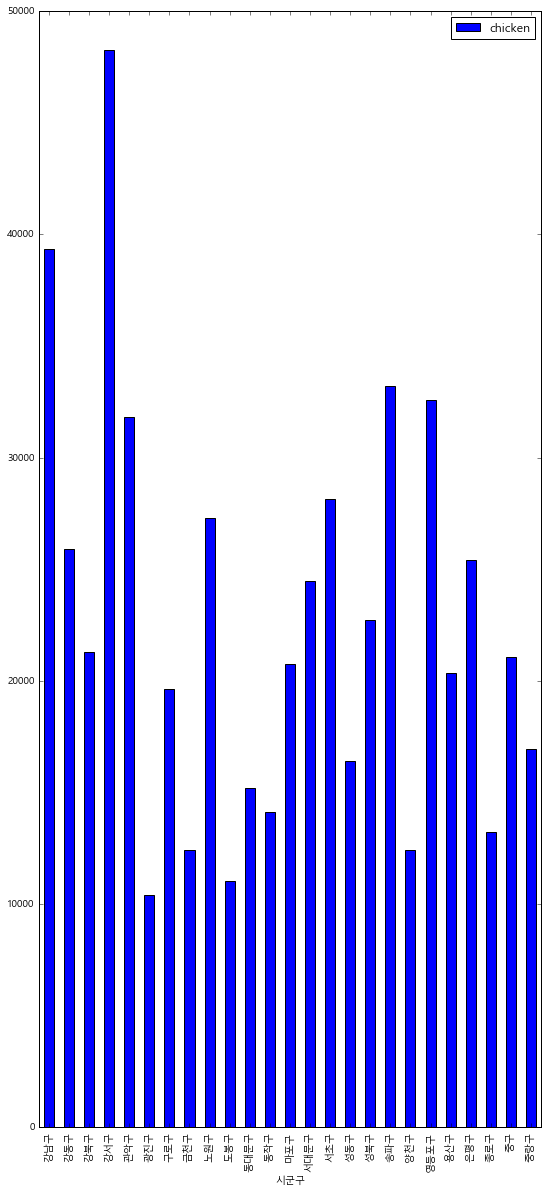

In [73]:
df2.plot(kind='bar', figsize = (9, 20))
plt.show()

In [74]:
# 분석을 위해 CALL_CFOOD_11MONTH.csv 로 부터 dataFrame 을 얻도록 한다.
df3 = pd.read_csv('./csv files/china/CALL_CFOOD_11MONTH.csv')
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47675 entries, 0 to 47674
Data columns (total 9 columns):
기준일     47675 non-null int64
요일      47675 non-null object
성별      47675 non-null object
연령대     47675 non-null object
시도      47675 non-null object
시군구     47675 non-null object
읍면동     47675 non-null object
업종      47675 non-null object
통화건수    47675 non-null int64
dtypes: int64(2), object(7)
memory usage: 2.0+ MB


In [75]:
gs = df3.groupby(["시군구"])
call_num = gs["통화건수"]
#call_num.sum()
df4 = call_num.agg(["sum"])
df4.columns = ['china']
df4

,china
시군구,
강남구,48405
강동구,24650
강북구,17555
강서구,34146
관악구,24037
광진구,10103
구로구,12960
금천구,8627
노원구,17408


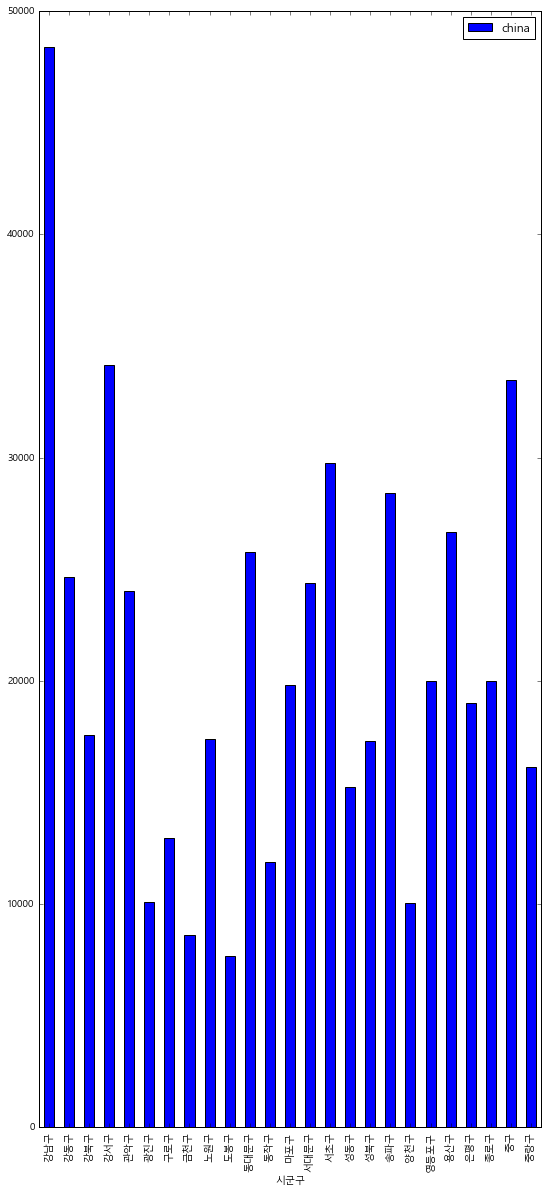

In [76]:
df4.plot(kind='bar', figsize = (9, 20))
plt.show()

In [77]:
df5 = pd.merge(df2, df4, how = 'outer', right_index = True, left_index = True )
df5

,chicken,china
시군구,,
강남구,39336,48405
강동구,25916,24650
강북구,21294,17555
강서구,48268,34146
관악구,31815,24037
광진구,10398,10103
구로구,19624,12960
금천구,12407,8627
노원구,27276,17408


In [78]:
df5.describe()

,chicken,china
count,25.000000,25.000000
mean,22581.440000,20937.240000
std,9368.755272,9396.445681
min,10398.000000,7673.000000
25%,15206.000000,15245.000000
50%,21071.000000,19802.000000
75%,27276.000000,25769.000000
max,48268.000000,48405.000000


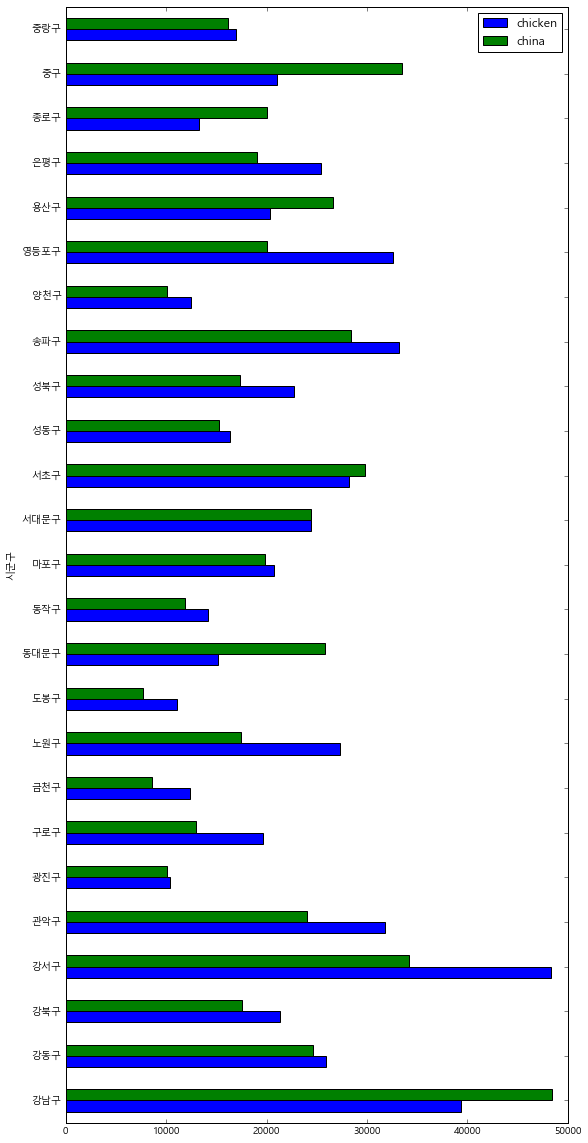

In [79]:
df5.plot(kind='barh', figsize = (9, 20))
plt.show()

### '치킨집 배달 이용 건수'의 평균은 22581건, '중국집 배달 이용 건수'의 평균은 20937건으로 확인되었습니다.

### 위 자료를 통해 '치킨집 배달 이용 건수'가 가장 높은 지역은 강서구이고 '중국집 배달 이용 건수'가 가장 높은 지역은 강남구 인것으로 확인되었습니다

### 또한 두 메뉴간 편차가 심한 지역은 중구, 동대문구, 강남구(중국집 > 치킨집), 영등포구, 노원구, 강서구(중국집 < 치킨집)로 확인됐습니다.

### 편차가 극명하게 나타나는 '중구'와 '강서구'를 살펴보겠스니다.

In [80]:
df6 = df1[ (df1["시군구"] == "중구") | (df1["시군구"] == "강서구") ]
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4133 entries, 209 to 47590
Data columns (total 9 columns):
기준일     4133 non-null int64
요일      4133 non-null object
성별      4133 non-null object
연령대     4133 non-null object
시도      4133 non-null object
시군구     4133 non-null object
읍면동     4133 non-null object
업종      4133 non-null object
통화건수    4133 non-null int64
dtypes: int64(2), object(7)
memory usage: 209.9+ KB


In [81]:
df7 = df6.pivot_table(["통화건수"], index=["시군구", "읍면동"], aggfunc='sum')
df7

통화건수
시군구 읍면동          
강서구 가양동      3073
    내발산동    15481
    등촌동      5661
    마곡동         5
    방화동      4478
    염창동      2234
    오곡동       315
    외발산동     1236
    화곡동     15785
중구  남대문로1가    140
    남대문로2가    200
    남대문로4가    220
    명동2가      270
    무교동        15
    소공동        80
    수표동       210
    수하동      2440
    순화동        95
    신당동     13379
    예장동        90
    을지로3가     430
    을지로4가      60
    입정동       310
    장충동2가     175
    저동1가      305
    주교동       515
    충무로1가     450
    충무로4가    1092
    태평로2가     280
    필동2가       75
    흥인동       240

In [82]:
df8 = df3[ (df3["시군구"] == "중구") | (df3["시군구"] == "강서구") ]
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4684 entries, 218 to 47623
Data columns (total 9 columns):
기준일     4684 non-null int64
요일      4684 non-null object
성별      4684 non-null object
연령대     4684 non-null object
시도      4684 non-null object
시군구     4684 non-null object
읍면동     4684 non-null object
업종      4684 non-null object
통화건수    4684 non-null int64
dtypes: int64(2), object(7)
memory usage: 237.9+ KB


In [83]:
df9 = df8.pivot_table(["통화건수"], index=["시군구", "읍면동"], aggfunc='sum')
df9

통화건수
시군구 읍면동          
강서구 가양동      1956
    내발산동    10096
    등촌동      3907
    방화동      2554
    염창동      1462
    오곡동       120
    외발산동     1259
    화곡동     12792
중구  남대문로1가    656
    남대문로2가    155
    남대문로4가    370
    명동2가      618
    소공동        95
    수표동       573
    수하동      6882
    순화동       250
    신당동     17873
    예장동       260
    을지로3가     929
    을지로4가      30
    입정동       175
    장충동2가     110
    저동1가      537
    주교동       793
    충무로1가     929
    충무로4가    1307
    태평로2가     821
    필동2가       30
    흥인동        70

In [84]:
df10 = pd.merge(df7, df9, how = 'outer', right_index = True, left_index = True )
df10.columns = ['chicken', 'china']
df10

chicken    china
시군구 읍면동                     
강서구 가양동        3073   1956.0
    내발산동      15481  10096.0
    등촌동        5661   3907.0
    마곡동           5      NaN
    방화동        4478   2554.0
    염창동        2234   1462.0
    오곡동         315    120.0
    외발산동       1236   1259.0
    화곡동       15785  12792.0
중구  남대문로1가      140    656.0
    남대문로2가      200    155.0
    남대문로4가      220    370.0
    명동2가        270    618.0
    무교동          15      NaN
    소공동          80     95.0
    수표동         210    573.0
    수하동        2440   6882.0
    순화동          95    250.0
    신당동       13379  17873.0
    예장동          90    260.0
    을지로3가       430    929.0
    을지로4가        60     30.0
    입정동         310    175.0
    장충동2가       175    110.0
    저동1가        305    537.0
    주교동         515    793.0
    충무로1가       450    929.0
    충무로4가      1092   1307.0
    태평로2가       280    821.0
    필동2가         75     30.0
    흥인동         240     70.0

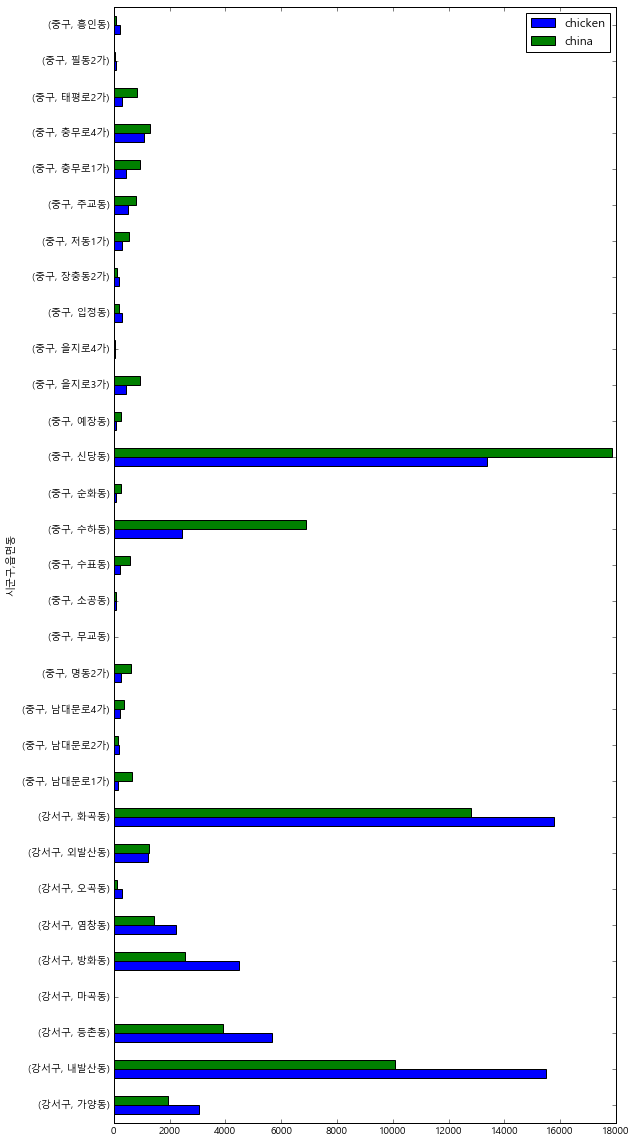

In [85]:
df10.plot(kind='barh', figsize = (9, 20))
plt.show()

### 위 그래프에서 중구에서는 신당동과 수하동에서 이용 건수가 가장 많음을 알 수 있고, 강서구에서는 화곡동과 내발산동에서 이용건수가 가장 많음을 알 수 있습니다 

## 강서구 내발산동을 면밀히 분석해 보겠습니다(치킨집 이용 건수가 높은 동네)

In [86]:
df11 = df1[ (df1["읍면동"] == "내발산동")]
df11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 217 to 46389
Data columns (total 9 columns):
기준일     360 non-null int64
요일      360 non-null object
성별      360 non-null object
연령대     360 non-null object
시도      360 non-null object
시군구     360 non-null object
읍면동     360 non-null object
업종      360 non-null object
통화건수    360 non-null int64
dtypes: int64(2), object(7)
memory usage: 18.3+ KB


In [87]:
df11.describe()

,기준일,통화건수
count,3.600000e+02,360.000000
mean,2.016112e+07,43.002778
std,8.667488e+00,34.552330
min,2.016110e+07,5.000000
25%,2.016111e+07,15.750000
50%,2.016112e+07,30.500000
75%,2.016112e+07,64.000000
max,2.016113e+07,148.000000


In [88]:
df12 = df3[ (df3["읍면동"] == "내발산동")]
df12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358 entries, 225 to 46410
Data columns (total 9 columns):
기준일     358 non-null int64
요일      358 non-null object
성별      358 non-null object
연령대     358 non-null object
시도      358 non-null object
시군구     358 non-null object
읍면동     358 non-null object
업종      358 non-null object
통화건수    358 non-null int64
dtypes: int64(2), object(7)
memory usage: 18.2+ KB


In [89]:
df12.describe()

,기준일,통화건수
count,3.580000e+02,358.000000
mean,2.016112e+07,28.201117
std,8.668417e+00,21.336278
min,2.016110e+07,5.000000
25%,2.016111e+07,11.000000
50%,2.016112e+07,22.000000
75%,2.016112e+07,43.000000
max,2.016113e+07,98.000000


In [90]:
df11 = pd.pivot_table(df11,'통화건수', aggfunc = sum, index=['요일'], columns='연령대')
df13 = df11[['10대', '20대', '30대', '40대', '50대', '60대이상']]
df13

연령대,10대,20대,30대,40대,50대,60대이상
요일,,,,,,
금,194,403,892,660,199,87
목,166,348,696,503,139,58
수,157,443,776,602,195,81
월,104,266,479,333,134,52
일,164,490,869,702,192,86
토,199,545,972,867,238,91
화,161,406,696,584,176,76


In [91]:
df12 = pd.pivot_table(df12,'통화건수', aggfunc = sum, index=['요일'], columns='연령대')
df14 = df12[['10대', '20대', '30대', '40대', '50대', '60대이상']]
df14

연령대,10대,20대,30대,40대,50대,60대이상
요일,,,,,,
금,52,162,367,374,168,105
목,61,136,383,374,158,87
수,67,157,448,429,225,100
월,45,160,321,306,124,80
일,76,297,629,595,260,96
토,64,248,574,569,238,105
화,63,188,466,447,192,100


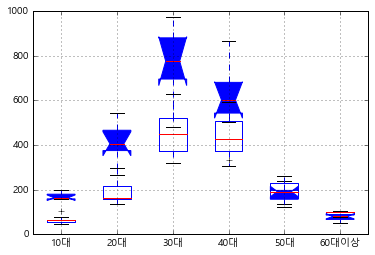

In [92]:
df13.boxplot(return_type='axes', notch=True, patch_artist=True)
df14.boxplot(return_type='axes')
plt.show()

### 내발산동을 분석한 위 그래프를 보면 10대, 20대, 30대, 40대에서 중국집보다 치킨집의 이용 건수가 높음을 확인할 수 있다

## 중구의 신당동을 살펴보겠습니다

In [93]:
df15 = df1[ (df1["읍면동"] == "신당동")]
df15.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 1440 to 47581
Data columns (total 9 columns):
기준일     360 non-null int64
요일      360 non-null object
성별      360 non-null object
연령대     360 non-null object
시도      360 non-null object
시군구     360 non-null object
읍면동     360 non-null object
업종      360 non-null object
통화건수    360 non-null int64
dtypes: int64(2), object(7)
memory usage: 18.3+ KB


In [100]:
df16 = df3[ (df3["읍면동"] == "신당동")]
df16.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 1415 to 47612
Data columns (total 9 columns):
기준일     360 non-null int64
요일      360 non-null object
성별      360 non-null object
연령대     360 non-null object
시도      360 non-null object
시군구     360 non-null object
읍면동     360 non-null object
업종      360 non-null object
통화건수    360 non-null int64
dtypes: int64(2), object(7)
memory usage: 18.3+ KB


In [102]:
df15 = pd.pivot_table(df15,'통화건수', aggfunc = sum, index=['요일'], columns='연령대')
df17 = df15[['10대', '20대', '30대', '40대', '50대', '60대이상']]
df17

연령대,10대,20대,30대,40대,50대,60대이상
요일,,,,,,
금,123,421,652,635,229,84
목,118,360,439,401,166,79
수,125,442,626,527,208,77
월,88,315,359,282,112,50
일,128,477,620,558,206,100
토,173,495,737,695,255,95
화,143,437,574,490,203,75


In [103]:
df16 = pd.pivot_table(df16,'통화건수', aggfunc = sum, index=['요일'], columns='연령대')
df18 = df16[['10대', '20대', '30대', '40대', '50대', '60대이상']]
df18

연령대,10대,20대,30대,40대,50대,60대이상
요일,,,,,,
금,78,407,663,600,397,240
목,108,437,603,582,327,236
수,113,557,742,670,433,231
월,56,383,478,512,301,161
일,100,519,799,750,390,244
토,103,529,868,877,465,295
화,98,565,672,614,414,256


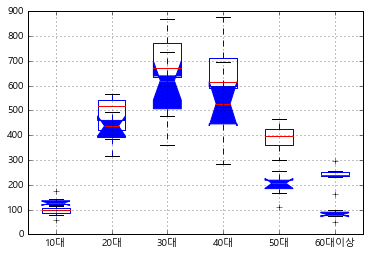

In [104]:

df17.boxplot(return_type='axes', notch=True, patch_artist=True)
df18.boxplot(return_type='axes')
plt.show()

### 중국집 이용 건수가 높았던 신당동의 경우 20대부터 60대까지 모두 중국집 이용 건수가 많았다는것을 확인할 수 있었음